# Market Sales Exploratory Data Analysis (EDA)

## Import librarries and read dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', 500)

In [6]:
sales_df = pd.read_csv("C:\\Users\\danns\\OneDrive\\Área de Trabalho\\Projects Data/train.csv")

## Data overview

In [7]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
sales_df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4763,4764,CA-2015-112851,17/09/2015,21/09/2015,Standard Class,NR-18550,Nick Radford,Consumer,United States,Chula Vista,California,91911.0,West,OFF-EN-10001453,Office Supplies,Envelopes,"Tyvek Interoffice Envelopes, 9 1/2"" x 12 1/2"",...",182.940
2249,2250,CA-2016-116092,15/02/2016,18/02/2016,Second Class,JM-16195,Justin MacKendrick,Consumer,United States,Los Angeles,California,90004.0,West,OFF-BI-10000546,Office Supplies,Binders,Avery Durable Binders,11.520
847,848,CA-2016-114300,13/10/2016,17/10/2016,Standard Class,AF-10885,Art Foster,Consumer,United States,Louisville,Kentucky,40214.0,South,FUR-CH-10001891,Furniture,Chairs,Global Deluxe Office Fabric Chairs,287.940
126,127,US-2018-107272,05/11/2018,12/11/2018,Standard Class,TS-21610,Troy Staebel,Consumer,United States,Phoenix,Arizona,85023.0,West,OFF-BI-10003274,Office Supplies,Binders,"Avery Durable Slant Ring Binders, No Labels",2.388
8712,8713,US-2016-145422,03/12/2016,07/12/2016,Standard Class,PW-19240,Pierre Wener,Consumer,United States,San Francisco,California,94110.0,West,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",359.499


In [9]:
def overview(df):
    l = []
    columns = sales_df.columns
    for column in columns:
        nunique = sales_df[column].nunique()
        sum_null = sales_df[column].isnull().sum()
        dtypes = sales_df[column].dtypes
        l.append([column, nunique, sum_null, dtypes])
    df_overviewed = pd.DataFrame(l)
    df_overviewed.columns = ["column", "nunique", "null", "dtypes"]
    return df_overviewed


In [10]:
overview(sales_df)

,column,nunique,null,dtypes
0,Row ID,9800,0,int64
1,Order ID,4922,0,object
2,Order Date,1230,0,object
3,Ship Date,1326,0,object
4,Ship Mode,4,0,object
5,Customer ID,793,0,object
6,Customer Name,793,0,object
7,Segment,3,0,object
8,Country,1,0,object
9,City,529,0,object


## Null data

In [11]:
sales_df[sales_df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [12]:
sales_df["Postal Code"] = sales_df["Postal Code"].fillna(5401)

In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Check duplicates

In [14]:
sales_df[sales_df.duplicated()].sum()

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
dtype: float64

## Validation date columns

In [15]:
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"],  format= '%d/%m/%Y')
sales_df["Ship Date"] = pd.to_datetime(sales_df["Ship Date"], format= '%d/%m/%Y')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Cleaning data

In [16]:
sales_df["Date_dif"] = sales_df["Ship Date"] - sales_df["Order Date"]
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Date_dif
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days


In [17]:
sales_df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country                   object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Date_dif         timedelta64[ns]
dtype: object

In [18]:
sales_df["Date_dif"] = sales_df["Date_dif"].astype("str")

In [19]:
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Date_dif
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7 days
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,5 days
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,5 days
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,5 days


In [20]:
days = sales_df["Date_dif"].str.split()
days_dif = []
for day in days:
    number_days = day[0]
    days_dif.append(number_days)

In [21]:
sales_df["Days_dif"] = days_dif

In [22]:
sales_df["Days_dif"] = sales_df["Days_dif"].astype(int)

In [23]:
sales_df.drop(["Date_dif"], axis = 1, inplace = True)

In [24]:
sales_df[sales_df["Days_dif"] < 0].sum()

C:\Users\danns\AppData\Local\Temp\ipykernel_9016\2478302532.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_df[sales_df["Days_dif"] < 0].sum()


Row ID           0.0
Order ID         0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Days_dif         0.0
dtype: float64

In [25]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [26]:
sales_df["Country"].unique()

array(['United States'], dtype=object)

In [27]:
sales_df.drop(["Country", "Row ID"], axis = 1, inplace = True)

In [28]:
sales_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


## Add date columns

In [29]:
sales_df['Year'] = sales_df['Order Date'].dt.year
sales_df['Month'] = sales_df['Order Date'].dt.month
sales_df['Day'] = sales_df['Order Date'].dt.day

In [30]:
sales_df["Day of Week"] = sales_df["Order Date"].dt.strftime("%A")

In [31]:
sales_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif,Year,Month,Day,Day of Week
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,2017,11,8,Wednesday
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2017,11,8,Wednesday
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,6,12,Monday
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,2016,10,11,Tuesday
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2016,10,11,Tuesday


## Exploratory Data Analysis

In [32]:
sales_df["Category"].unique(), sales_df["Ship Mode"].unique(), sales_df["Sub-Category"].unique()

(array(['Furniture', 'Office Supplies', 'Technology'], dtype=object),
 array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
        'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
        'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
        'Copiers'], dtype=object))

In [33]:
sales_df.groupby(["Category", "Sub-Category"]).agg({"Sales": "sum"})

Sales
Category        Sub-Category             
Furniture       Bookcases     113813.1987
                Chairs        322822.7310
                Furnishings    89212.0180
                Tables        202810.6280
Office Supplies Appliances    104618.4030
                Art            26705.4100
                Binders       200028.7850
                Envelopes      16128.0460
                Fasteners       3001.9600
                Labels         12347.7260
                Paper          76828.3040
                Storage       219343.3920
                Supplies       46420.3080
Technology      Accessories   164186.7000
                Copiers       146248.0940
                Machines      189238.6310
                Phones        327782.4480

Text(0.5, 1.0, 'Sales by Categories')

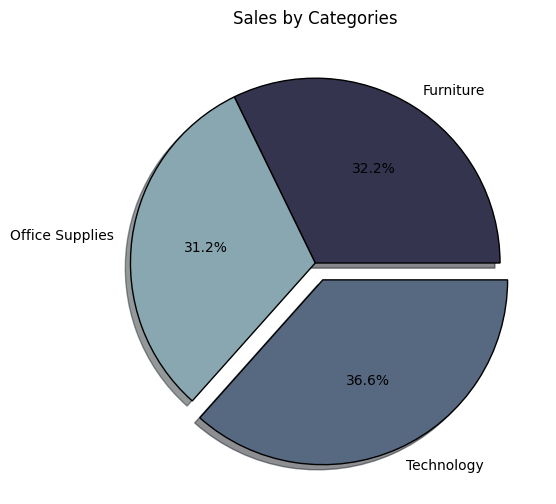

In [34]:
fig = plt.figure(figsize = (8,6))
sales_category = sales_df.groupby("Category").agg({"Sales": "sum"}).reset_index()
labels = sales_category["Category"].tolist()
myexplode = [0, 0, 0.1]
fig = plt.pie(sales_category["Sales"], labels= labels, shadow=True, explode = myexplode, autopct="%1.1f%%", 
              wedgeprops={"edgecolor":"black"}, colors = ["#34344e", "#89a7b1", "#566981"])
plt.title("Sales by Categories")

In [35]:
sales_subcategory = sales_df.groupby("Sub-Category").agg({"Sales": "sum"}).reset_index()

fig = px.pie(sales_subcategory, values='Sales', names='Sub-Category', 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="Sales By Sub-Category")

Text(0.5, 1.0, 'Sales by Ship Mode')

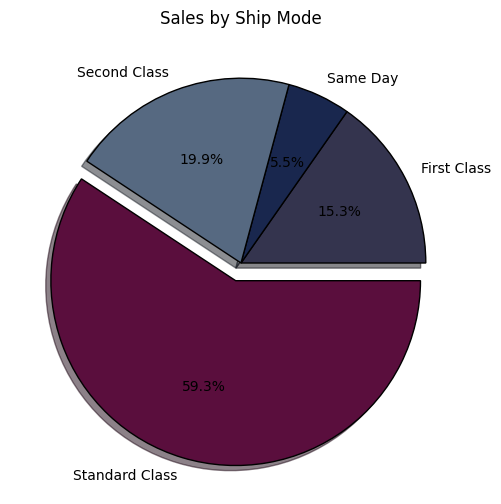

In [36]:
fig = plt.figure(figsize = (8,6))
sales_shipmode = sales_df.groupby("Ship Mode").agg({"Sales": "sum"}).reset_index()
labels = sales_shipmode["Ship Mode"].tolist()
myexplode = [0, 0, 0, 0.1]
fig = plt.pie(sales_shipmode["Sales"], labels= labels, shadow=True, explode = myexplode, autopct="%1.1f%%", 
              wedgeprops={"edgecolor":"black"}, colors = ["#34344e", "#19274e", "#566981", "#5a0e3d"])
plt.title("Sales by Ship Mode")

In [37]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9800.0,55217.343265,32066.750532,1040.000,23223.000,57551.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48
Days_dif,9800.0,3.961122,1.749614,0.000,3.000,4.00,5.000,7.00
Year,9800.0,2016.724184,1.123984,2015.000,2016.000,2017.00,2018.000,2018.00
Month,9800.0,7.818469,3.281905,1.000,5.000,9.00,11.000,12.00
Day,9800.0,15.486837,8.753733,1.000,8.000,16.00,23.000,31.00


In [38]:
sales_df[sales_df["Sales"] == 22638.48]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif,Year,Month,Day,Day of Week
2697,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,5,2015,3,18,Wednesday


In [39]:
sales_df[sales_df["Sales"] == 0.444]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif,Year,Month,Day,Day of Week
4101,US-2018-102288,2018-06-19,2018-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,4,2018,6,19,Tuesday


In [40]:
top_cities = sales_df.pivot_table(values = "Sales", aggfunc= "sum", index= "City")
top_cities = top_cities.sort_values(by=["Sales"], ascending= False).head(15)
top_cities = top_cities["Sales"].round(2)
top_cities = top_cities.reset_index()
top_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


In [41]:
fig_labels = {"Sales": "Sales", "City": "Best Cities"}
fig = px.bar(top_cities,y = "Sales", x = "City", color='Sales', title = "Top 15 Sales by Cities", labels = fig_labels)
fig.show()

In [42]:
month_avg = sales_df.pivot_table(values = "Sales", aggfunc= "mean", index= "Month")
month_avg = month_avg.sort_values(by=["Month"], ascending= True)
month_avg = month_avg["Sales"].round(2)
month_avg = month_avg.reset_index()
month_avg

,Month,Sales
0,1,257.63
1,2,199.90
2,3,290.55
3,4,207.43
4,5,212.53
5,6,211.05
6,7,208.80
7,8,227.01
8,9,221.64
9,10,246.60


In [43]:
fig_labels = {"Sales": "Sales", "Month": "Month"}
fig = px.bar(month_avg,y = "Sales", x = "Month", color='Sales', title = "Average Sales per Month", labels = fig_labels)
fig.show()

Text(0, 0.5, 'Sales (Sum)')

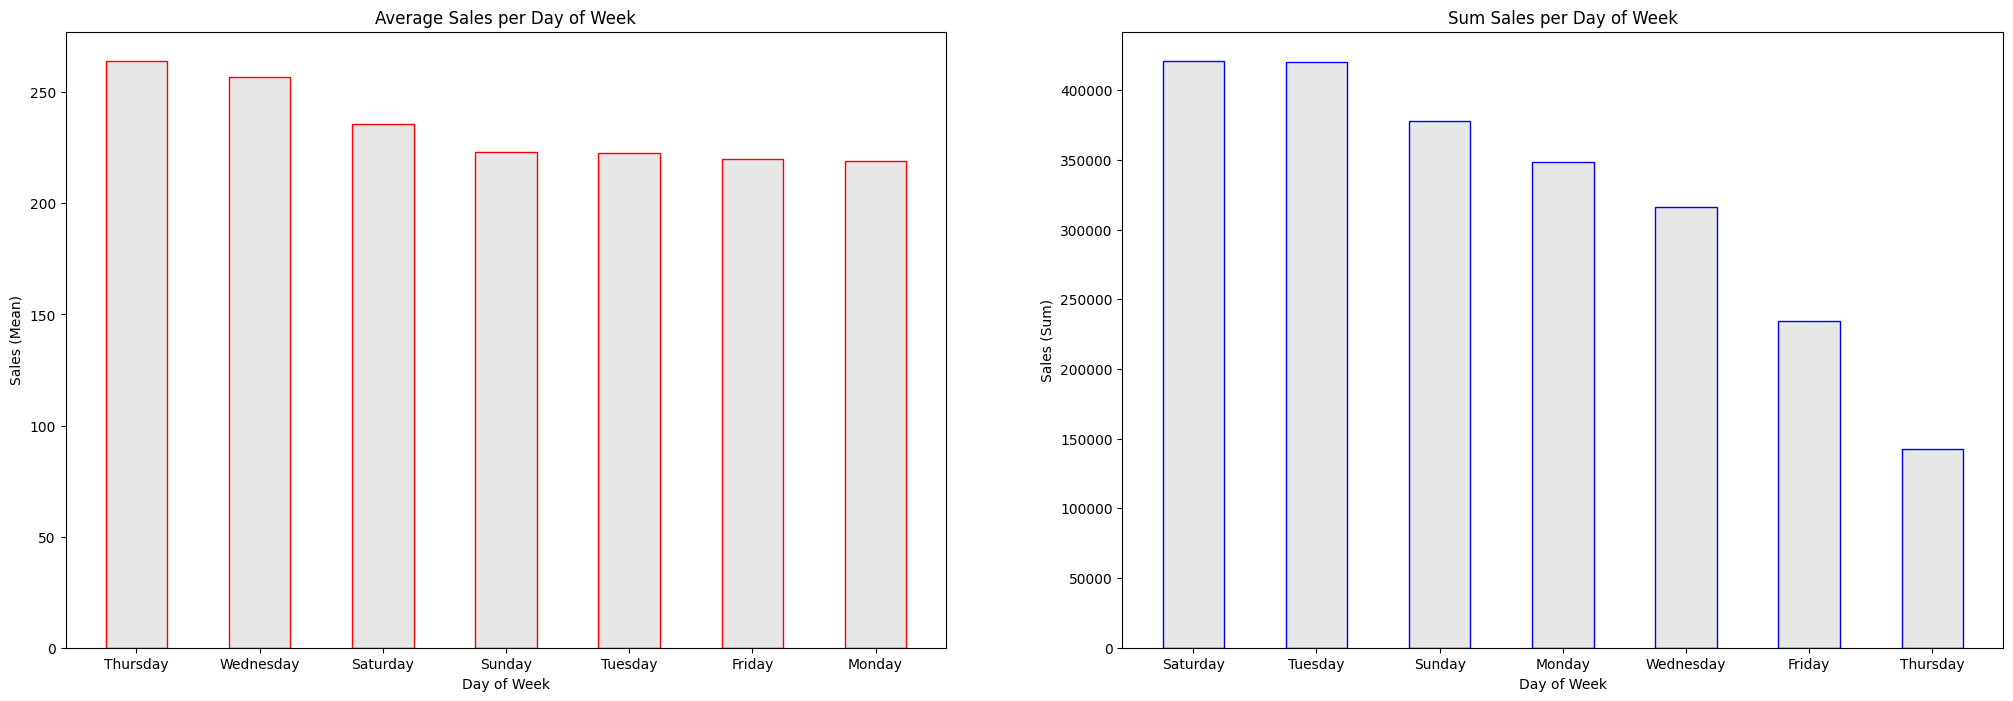

In [44]:
day_of_week_avg = sales_df.pivot_table(values = "Sales", aggfunc= "mean", index= "Day of Week")
day_of_week_avg = day_of_week_avg.sort_values(by=["Sales"], ascending= False)
day_of_week_avg = day_of_week_avg.reset_index()

day_of_week_sum = sales_df.pivot_table(values = "Sales", aggfunc= "sum", index= "Day of Week")
day_of_week_sum = day_of_week_sum.sort_values(by=["Sales"], ascending= False)
day_of_week_sum = day_of_week_sum.reset_index()

fig = plt.figure(figsize= [25,8
                           ])
ax = fig.add_subplot(1,2,1)



ax.bar(day_of_week_avg["Day of Week"], day_of_week_avg["Sales"], color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red', width = 0.5)
ax.set_title("Average Sales per Day of Week")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Sales (Mean)")


ax2 = fig.add_subplot(1,2,2)

ax2.bar(day_of_week_sum["Day of Week"], day_of_week_sum["Sales"], color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue', width = 0.5)
ax2.set_title("Sum Sales per Day of Week")
ax2.set_xlabel("Day of Week")
ax2.set_ylabel("Sales (Sum)")



<Axes: title={'center': 'Sales by Region'}, xlabel='Region', ylabel='Sales'>

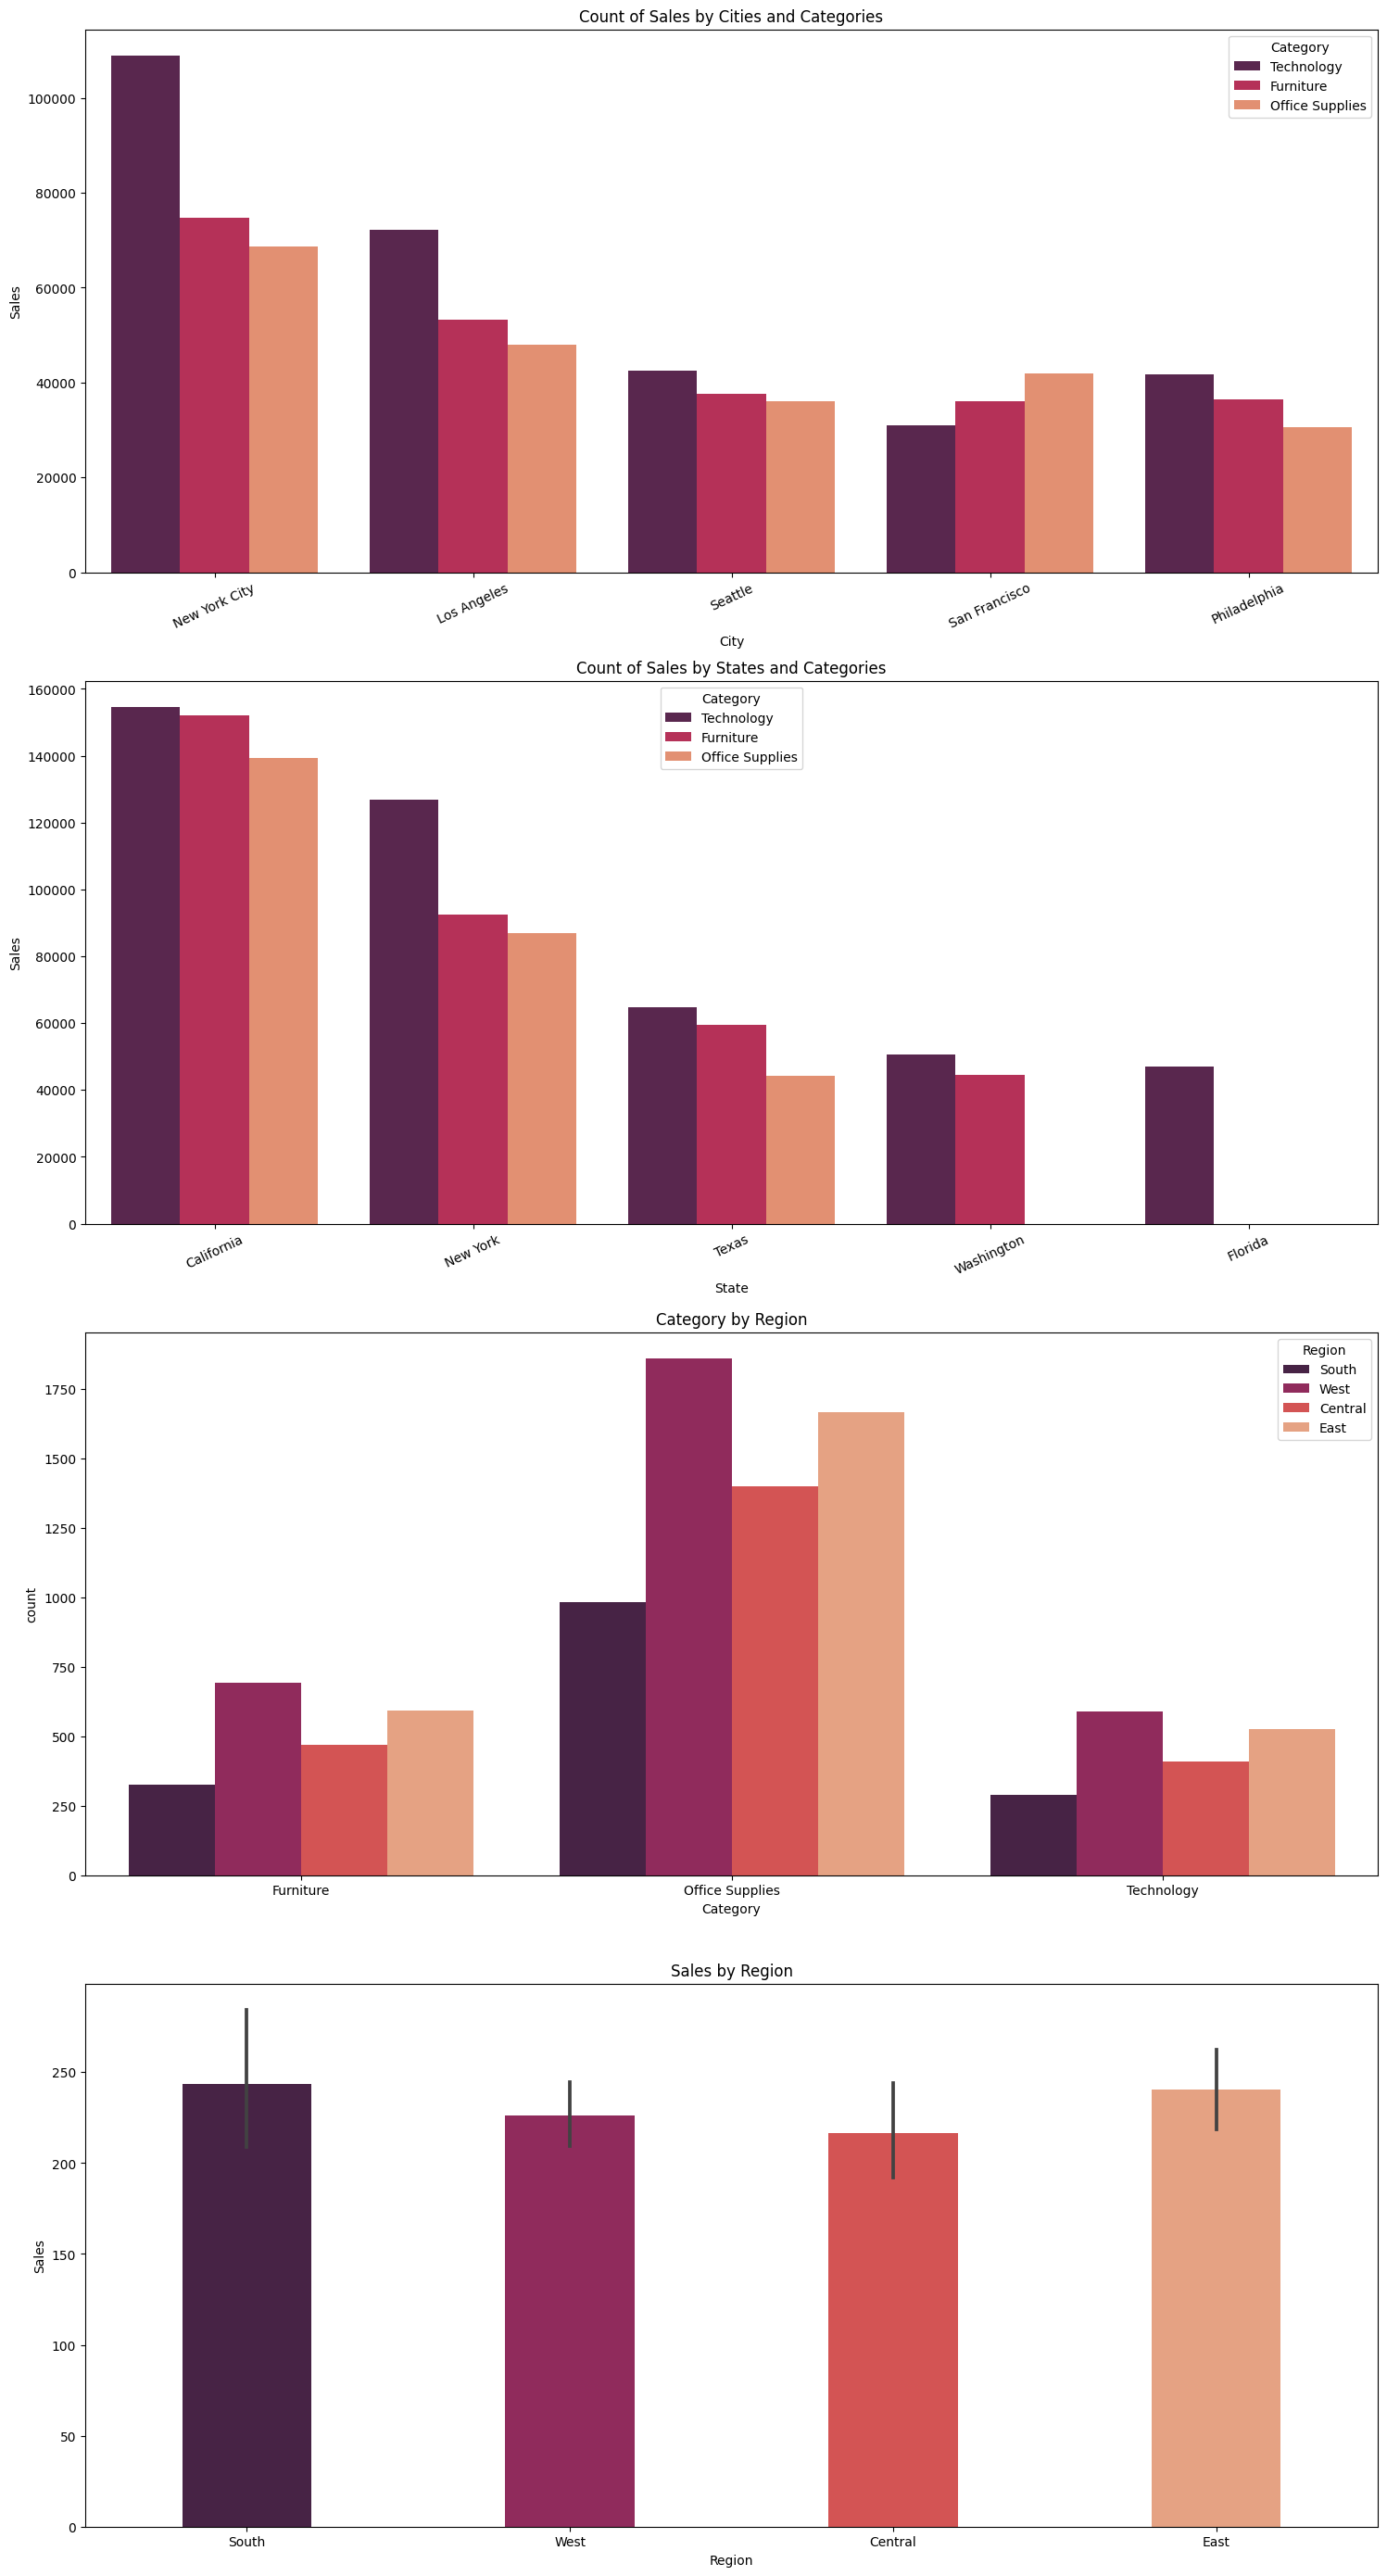

In [45]:
best_cities_categories = sales_df.groupby(["Category", "City"]).agg({"Sales": "sum"}).sort_values("Sales", ascending= False).head(15)
best_cities_categories = best_cities_categories["Sales"].round(2)
best_cities_categories = best_cities_categories.reset_index()

best_states_categories = sales_df.groupby(["Category", "State"]).agg({"Sales": "sum"}).sort_values("Sales", ascending= False).head(12)
best_states_categories = best_states_categories["Sales"].round(2)
best_states_categories = best_states_categories.reset_index()

plt.figure(figsize = (18, 35))

plt.subplot(4,1,1)

plt.title("Count of Sales by Cities and Categories")
plt.xticks(rotation=25)
sns.barplot(x='City',y='Sales',hue='Category',data=best_cities_categories,palette="rocket")

plt.subplot(4,1,2)

plt.title("Count of Sales by States and Categories")
plt.xticks(rotation=25)
sns.barplot(x='State',y='Sales',hue='Category',data=best_states_categories,palette="rocket")

plt.subplot(4,1,3)
plt.title("Category by Region")
sns.countplot(data = sales_df, x = "Category", hue = "Region", palette="rocket")

plt.subplot(4,1,4)
plt.title("Sales by Region")
sns.barplot(data = sales_df, x = "Region", y = "Sales", palette="rocket", width= 0.4 )


<Axes: title={'center': 'Top 10 Customers'}, xlabel='Customer Name', ylabel='Sales'>

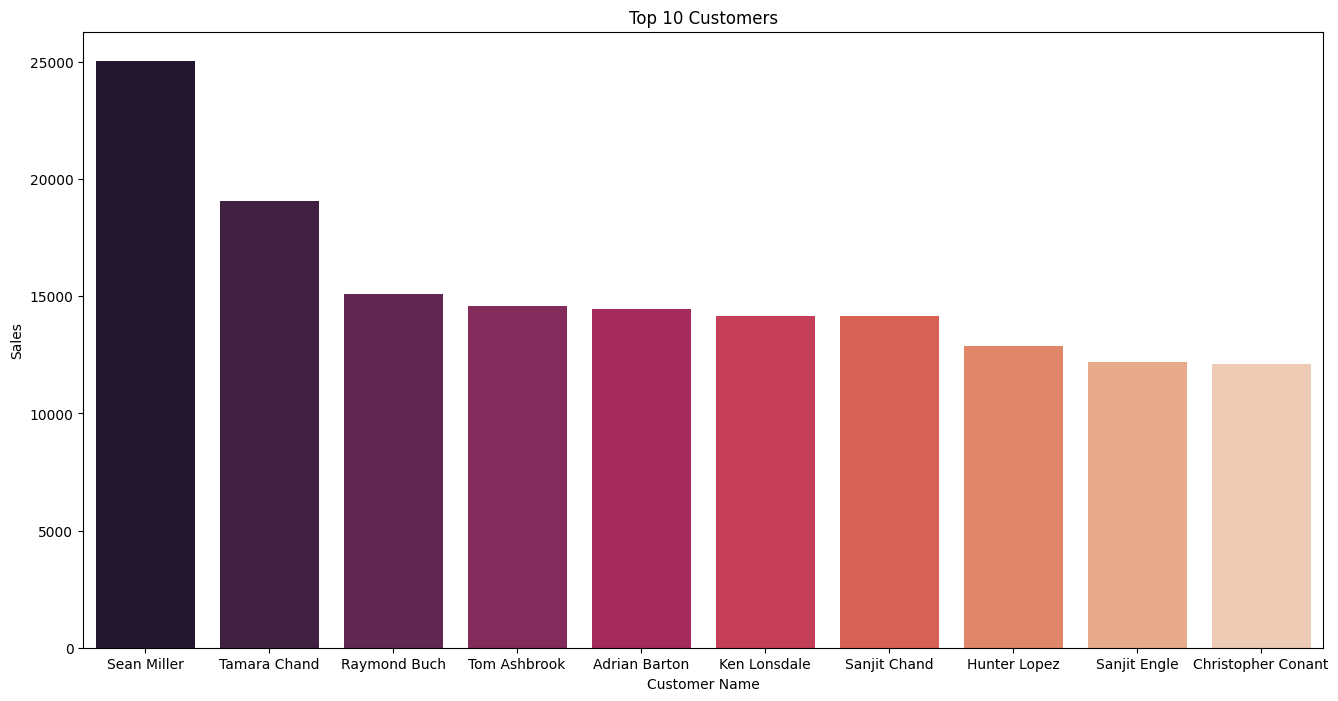

In [46]:
top_customer = sales_df.groupby(["Customer Name"]).agg({"Sales": "sum"}).sort_values("Sales", ascending= False).head(10)
top_customer = top_customer.reset_index()

plt.figure(figsize=(16,8))
plt.title("Top 10 Customers")

sns.barplot(x = "Customer Name", y = "Sales", data = top_customer, palette = "rocket")


Text(0, 0.5, 'Count of Customers')

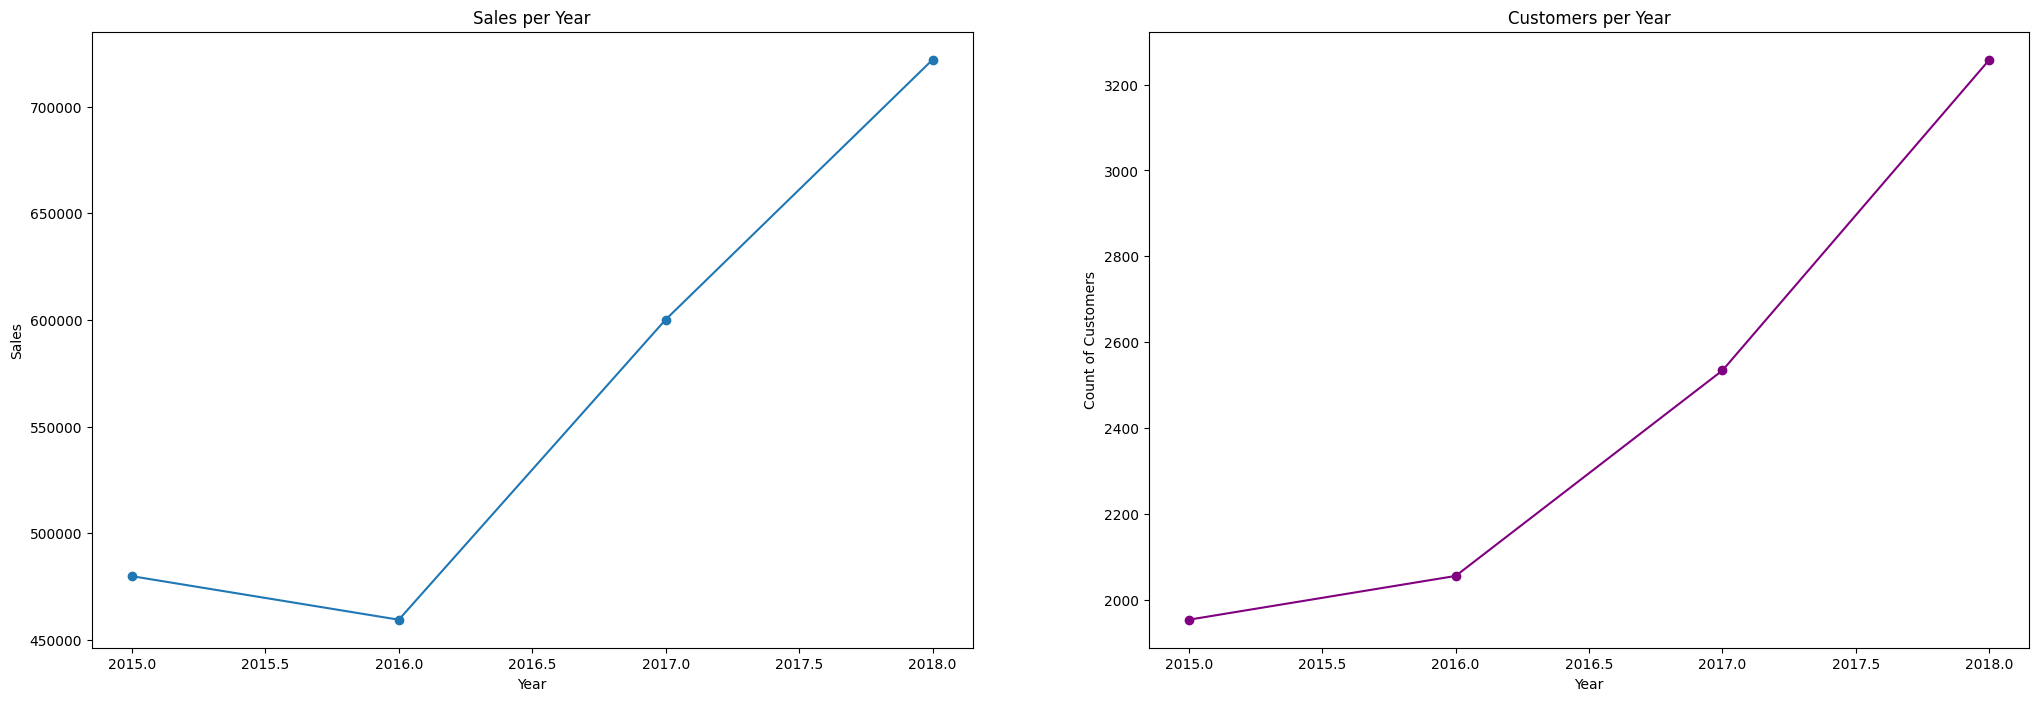

In [47]:
sales_year = sales_df.groupby(["Year"]).agg({"Sales":"sum"}).sort_values("Year", ascending = True)
sales_year = sales_year.reset_index()

count_customers = sales_df.groupby(["Year"]).agg({"Customer Name": "count"}).sort_values("Year", ascending = True)
count_customers = count_customers.reset_index()

fig = plt.figure(figsize = (25, 8))
ax = fig.add_subplot(1,2,1)

ax.plot(sales_year["Year"], sales_year["Sales"], marker = "o")
ax.set_title("Sales per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Sales")

ax2 = fig.add_subplot(1,2,2)

ax2.plot(count_customers["Year"], count_customers["Customer Name"], marker = "o", color = "purple")
ax2.set_title("Customers per Year")
ax2.set_xlabel("Year")
ax2.set_ylabel("Count of Customers")

